### TRABALHO 2 CIÊNCIA DE DADOS 
Aluno: Nickolas Crema  
Professor: Andre Gustavo Maletzke

## DATASET BANK-MARKETING
### Objetivos do dataset:
O dataset se baseia em marketing de campanhas realizadas por telefone de um banco português. O objetivo da classificação é predizer se o cliente vai subscrever um depósito a prazo ou não.

### Features
O dataset contém 17 "features"  
V1 - A idade do cliente - Númerico  
V2 - O tipo de trabalho que o cliente exerce - Categórico ("admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar", "self-employed", "retired", "technician", "services")  
V3 - O estado cívil do cliente - Categórico  ("married", "divorced", "single"; note: "divorced" means divorced or widowed)  
V4 - Nível de escolaridade do cliente - Categórico ("unknown", "secondary", "primary", "tertiary")  
V5 - Se o cliente tem crédito inadimplente - Binário ("yes", "no")  
V6 - Saldo médio anual - Númerico  
V7 - Se o cliente tem crédito habitacional - Binário ("yes", "no")  
V8 - Se o cliente tem empréstimo pessoal - Binário ("yes", "no")   
V9 - Meio de contato - Númerico  
V10 - O último dia de contato do mês - Categórico ("unknown", "telephone", "cellular")  
V11 - O último mês de contato do ano - Categórico ("jan", "feb", "mar", ..., "nov", "dec")  
V12 - A duração do último contato - Númerico  
V13 - Número de contatos realizados nesta campanha para este cliente - Númerico  
V14 - Número de dias que se passaram desde que o cliente foi contatado pela última vez em uma campanha anterior - Númerico  
V15 - Número de contactos realizados antes desta campanha e para este cliente - Númerico  
V16 - Resultado da campanha anterior para este cliente - Categórico  
V17 - target y - Se o cliente subscreveu ao depósito a prazo ou não - Binário ("yes", "no")  
  
link do dataset: https://www.openml.org/search?type=data&sort=runs&id=1461&status=active

### Hipótese
H0: O cliente subscrever ou não ao depósito a prazo se da pelo saldo médio anual do cliente e a duração do contato durante a campanha

In [495]:
import pandas as pd
from scipy.io.arff import loadarff
# from matplot import pyplot as plt
import numpy as np
import seaborn as sns
import warnings
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler, NearMiss, OneSidedSelection
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV



Verificando as colunas do DataFrame

In [496]:
raw_data = loadarff('dataset.arff')
df = pd.DataFrame(raw_data[0])
df.head(2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,Class
0,58.0,b'management',b'married',b'tertiary',b'no',2143.0,b'yes',b'no',b'unknown',5.0,b'may',261.0,1.0,-1.0,0.0,b'unknown',b'1'
1,44.0,b'technician',b'single',b'secondary',b'no',29.0,b'yes',b'no',b'unknown',5.0,b'may',151.0,1.0,-1.0,0.0,b'unknown',b'1'


Renomeando as colunas do DataFrame

In [497]:
df.rename(columns={'V1': 'age', 'V2': 'job', 'V3': 'marital', 'V4': 'education', 'V5': 'default_in_credit', 'V6': 'balance', 'V7': 'housing_loan', 'V8': 'personal_loan', 'V9': 'contact', 'V10': 'last_day_contact_of_month', 'V11': 'last_month_contact_of_year', 'V12': 'contact_duration', 'V13': 'number_of_contacts_performed_during_campaign', 'V14': 'last_contact_of_previous_campaign', 'V15': 'number_of_contact_of_previous_campaign', 'V16': 'outcome_of_previous_campaign', 'Class': 'has_subscribed'}, inplace = True)
df.head(10)

,age,job,marital,education,default_in_credit,balance,housing_loan,personal_loan,contact,last_day_contact_of_month,last_month_contact_of_year,contact_duration,number_of_contacts_performed_during_campaign,last_contact_of_previous_campaign,number_of_contact_of_previous_campaign,outcome_of_previous_campaign,has_subscribed
0,58.0,b'management',b'married',b'tertiary',b'no',2143.0,b'yes',b'no',b'unknown',5.0,b'may',261.0,1.0,-1.0,0.0,b'unknown',b'1'
1,44.0,b'technician',b'single',b'secondary',b'no',29.0,b'yes',b'no',b'unknown',5.0,b'may',151.0,1.0,-1.0,0.0,b'unknown',b'1'
2,33.0,b'entrepreneur',b'married',b'secondary',b'no',2.0,b'yes',b'yes',b'unknown',5.0,b'may',76.0,1.0,-1.0,0.0,b'unknown',b'1'
3,47.0,b'blue-collar',b'married',b'unknown',b'no',1506.0,b'yes',b'no',b'unknown',5.0,b'may',92.0,1.0,-1.0,0.0,b'unknown',b'1'
4,33.0,b'unknown',b'single',b'unknown',b'no',1.0,b'no',b'no',b'unknown',5.0,b'may',198.0,1.0,-1.0,0.0,b'unknown',b'1'
5,35.0,b'management',b'married',b'tertiary',b'no',231.0,b'yes',b'no',b'unknown',5.0,b'may',139.0,1.0,-1.0,0.0,b'unknown',b'1'
6,28.0,b'management',b'single',b'tertiary',b'no',447.0,b'yes',b'yes',b'unknown',5.0,b'may',217.0,1.0,-1.0,0.0,b'unknown',b'1'
7,42.0,b'entrepreneur',b'divorced',b'tertiary',b'yes',2.0,b'yes',b'no',b'unknown',5.0,b'may',380.0,1.0,-1.0,0.0,b'unknown',b'1'
8,58.0,b'retired',b'married',b'primary',b'no',121.0,b'yes',b'no',b'unknown',5.0,b'may',50.0,1.0,-1.0,0.0,b'unknown',b'1'
9,43.0,b'technician',b'single',b'secondary',b'no',593.0,b'yes',b'no',b'unknown',5.0,b'may',55.0,1.0,-1.0,0.0,b'unknown',b'1'


Verificando os valores do atributo de resultado da campanha anterior

In [498]:
df_outcome_previous = pd.get_dummies(df['outcome_of_previous_campaign'])
df_outcome_previous.head(10)

,b'failure',b'other',b'success',b'unknown'
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,0,0,0,1
6,0,0,0,1
7,0,0,0,1
8,0,0,0,1
9,0,0,0,1


Convertendo os valores de categórico para numérico do atributo de resultado da campanha anterior

In [499]:
previous_outcome_campaign_dict = {b'failure': 0, b'success': 1, b'other': 2, b'unknown': 3}
for previous_outcome in previous_outcome_campaign_dict.keys():
    df['outcome_of_previous_campaign'].loc[(df['outcome_of_previous_campaign'] == previous_outcome)] = previous_outcome_campaign_dict[previous_outcome]
    warnings.filterwarnings('ignore')
print(previous_outcome_campaign_dict)

{b'failure': 0, b'success': 1, b'other': 2, b'unknown': 3}


Convertendo os valores de binário para numérico do target

In [500]:
dict_subscribed = {b'1': 1, b'2': 2}
for subs in dict_subscribed.keys():
    df['has_subscribed'].loc[(df['has_subscribed'] == subs)] = dict_subscribed[subs]
    warnings.filterwarnings('ignore')
print(dict_subscribed)

{b'1': 1, b'2': 2}


Eliminando atributos que não utilizaremos na hipótese

In [501]:
df.drop(['age', 'last_contact_of_previous_campaign', 'contact', 'job', 'number_of_contacts_performed_during_campaign', 'marital', 'education', 'default_in_credit', 'housing_loan', 'personal_loan', 'last_day_contact_of_month', 'last_month_contact_of_year', 'number_of_contact_of_previous_campaign'], axis=1, inplace=True)

Eliminando registros com dados faltantes

In [502]:
df.dropna(inplace=True)

In [503]:
df

,balance,contact_duration,outcome_of_previous_campaign,has_subscribed
0,2143.0,261.0,3,1
1,29.0,151.0,3,1
2,2.0,76.0,3,1
3,1506.0,92.0,3,1
4,1.0,198.0,3,1
...,...,...,...,...
45206,825.0,977.0,3,2
45207,1729.0,456.0,3,2
45208,5715.0,1127.0,1,2
45209,668.0,508.0,3,1


Analisando os dados podemos ver que a classe está desbalanceada, aplicaremos o KNN nos dados sem realizar um balanceamento, para visualizar sua acurácia e a quantidade de FP e FN

<AxesSubplot:xlabel='has_subscribed', ylabel='count'>

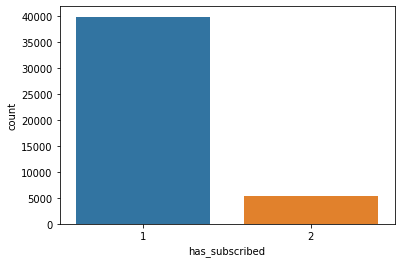

In [504]:
sns.countplot(x= 'has_subscribed', data=df)

Coletando os dados de treino e teste

In [505]:
x = df.drop(['has_subscribed'], axis= 1)
y = df['has_subscribed']

scaler = MinMaxScaler()
x = pd.DataFrame(scaler.fit_transform(x))
x.columns = df.columns[:2]

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, shuffle=True)
y_train = y_train.astype(int)
y_test = y_test.astype(int)


ValueError: Length mismatch: Expected axis has 3 elements, new values have 2 elements

Declarando a variável para KNN

In [506]:
knn = KNeighborsClassifier(n_neighbors=3)

Aplicando KNN nos dados

In [507]:
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
y_proba = knn.predict_proba(x_test)[:,1]

Resultados do modelo

Relatório de classificação: 
               precision    recall  f1-score   support

           1     0.9037    0.9446    0.9237      9981
           2     0.3644    0.2398    0.2892      1322

    accuracy                         0.8622     11303
   macro avg     0.6340    0.5922    0.6065     11303
weighted avg     0.8406    0.8622    0.8495     11303

Acurácia: 0.8622

AUC: 0.5922



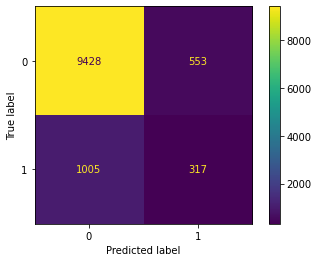

In [508]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred)).plot()
print('Relatório de classificação: \n', classification_report(y_test, y_pred, digits=4))
print('Acurácia: {:.4f}\n'.format(accuracy_score(y_test, y_pred)))
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))


Podemos visualizar uma alta taxa de FP, além de uma acurácia não tão desejada, faremos o balanceamento dos dados, tanto utilizando undersampling quanto utilizando oversampling para visualizar qual obtém resultados mais desejáveis

Declarando as variáveis para undersampling e oversampling

In [509]:
under_sampler = RandomUnderSampler(random_state=32)
over_sampler = RandomOverSampler(random_state=32)

Aplicando undersampling nos dados de treino

2    3967
1    3966
Name: has_subscribed, dtype: int64


<AxesSubplot:xlabel='has_subscribed', ylabel='count'>

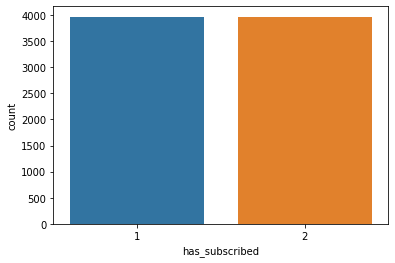

In [510]:
y_int = y.astype(int)
x_rus, y_rus = under_sampler.fit_resample(x, y_int)
x_rus_train, x_rus_test, y_rus_train, y_rus_test = train_test_split(x_rus, y_rus, stratify=y_rus, shuffle=True)
print(pd.Series(y_rus_train).value_counts())
sns.countplot(x=y_rus_train)

Aplicação do algoritmo KNN nos dados de treino, e predição dos dados de teste, balanceados com undersampling

In [511]:
knn.fit(x_rus_train, y_rus_train)
y_rus_pred = knn.predict(x_rus_test)
y_rus_proba = knn.predict_proba(x_rus_test)[:,1]

Resultados do modelo balanceado com undersampling

Relatório de classificação: 
               precision    recall  f1-score   support

           1     0.7403    0.7498    0.7450      1323
           2     0.7464    0.7368    0.7415      1322

    accuracy                         0.7433      2645
   macro avg     0.7433    0.7433    0.7433      2645
weighted avg     0.7433    0.7433    0.7433      2645

Acurácia: 0.7433

AUC: 0.7952



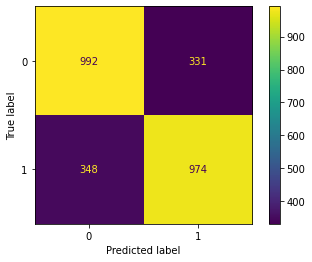

In [512]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_rus_test, y_rus_pred)).plot()
print('Relatório de classificação: \n', classification_report(y_rus_test, y_rus_pred, digits=4))
print('Acurácia: {:.4f}\n'.format(accuracy_score(y_rus_test, y_rus_pred)))
print("AUC: {:.4f}\n".format(roc_auc_score(y_rus_test, y_rus_proba)))

Analisando os resultados vemos um balanceamento na matriz de confusão, porém com uma taxa baixa de acertos em ambos os lados

Agora utilizaremos balancearemos os dados utilizando Oversampling

1    29942
2    29941
Name: has_subscribed, dtype: int64


<AxesSubplot:xlabel='has_subscribed', ylabel='count'>

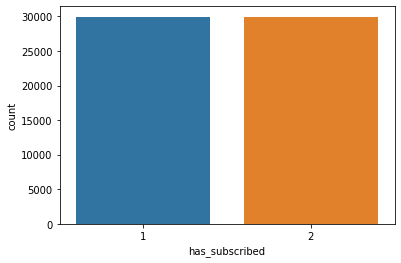

In [513]:
x_ros, y_ros = over_sampler.fit_resample(x, y_int)
x_ros_train, x_ros_test, y_ros_train, y_ros_test = train_test_split(x_ros, y_ros, stratify=y_ros, shuffle=True)
print(pd.Series(y_ros_train).value_counts())
sns.countplot(x=y_ros_train)

Aplicação do algoritmo KNN nos dados de treino, e predição dos dados de teste, balanceados com Oversampling

In [514]:
knn.fit(x_ros_train, y_ros_train)
y_ros_pred = knn.predict(x_ros_test)
y_ros_proba = knn.predict_proba(x_ros_test)[:,1]

Resultados do modelo balanceado com Oversampling

Relatório de classificação: 
               precision    recall  f1-score   support

           1     0.9849    0.8236    0.8971      9980
           2     0.8485    0.9874    0.9127      9981

    accuracy                         0.9055     19961
   macro avg     0.9167    0.9055    0.9049     19961
weighted avg     0.9167    0.9055    0.9049     19961

Acurácia: 0.9055

AUC: 0.9458



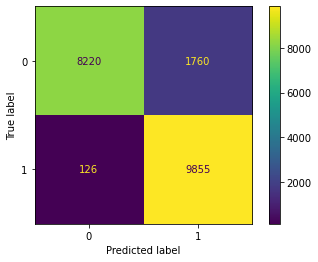

In [515]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_ros_test, y_ros_pred)).plot()
print('Relatório de classificação: \n', classification_report(y_ros_test, y_ros_pred, digits=4))
print('Acurácia: {:.4f}\n'.format(accuracy_score(y_ros_test, y_ros_pred)))
print("AUC: {:.4f}\n".format(roc_auc_score(y_ros_test, y_ros_proba)))


Analisando os resultados podemos verificar uma alta taxa de acertos da classe positiva, porém uma baixa taxa de acertos da classe negativa

Com base nos resultados, utilizaremos oversampling para balancear a classe do nosso problema

Utilizando GridSearch para encontrar o melhor valor para os parametros do KNN

In [516]:
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
parameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

gscv = GridSearchCV(knn, parameters, cv=10)
model = gscv.fit(x_ros_train, y_ros_train)

print('Melhor leaf_size:', model.best_estimator_.get_params()['leaf_size'])
print('Melhor p:', model.best_estimator_.get_params()['p'])
print('Melhor n_neighbors:', model.best_estimator_.get_params()['n_neighbors'])

y_gscv_pred = model.predict(x_ros_test)
y_gscv_proba = model.predict_proba(x_ros_test)[:,1]

Melhor leaf_size: 1
Melhor p: 2
Melhor n_neighbors: 1


Relatório de classificação: 
               precision    recall  f1-score   support

           1     0.9922    0.8969    0.9422      9980
           2     0.9059    0.9930    0.9475      9981

    accuracy                         0.9449     19961
   macro avg     0.9491    0.9449    0.9448     19961
weighted avg     0.9491    0.9449    0.9448     19961

Acurácia: 0.9449

AUC: 0.9449



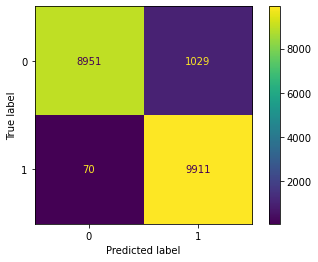

In [518]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_ros_test, y_gscv_pred)).plot()
print('Relatório de classificação: \n', classification_report(y_ros_test, y_gscv_pred, digits=4))
print('Acurácia: {:.4f}\n'.format(accuracy_score(y_ros_test, y_gscv_pred)))
print("AUC: {:.4f}\n".format(roc_auc_score(y_ros_test, y_gscv_proba)))